In [1]:
#r'C:\Users\Vaclav\Documents\Diploma\Dirty Signals\Test\Test14\snd-P3.20160212.0028.3.wav'
import cv2
import thinkplot
from thinkdsp import read_wave
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

# root="TEST", formats=['png']
def plot_save(wave, root, formats,**options):
        fs = wave.frequencies()
        i = None
        fs = fs[:i]
        ts = wave.times()

        # make the array
        size = len(fs), len(ts)
        array = np.zeros(size, dtype=np.float)

        # copy amplitude from each spectrum into a column of the array
        for j, t in enumerate(ts):
            spectrum = wave.spec_map[t]
            array[:, j] = spectrum.amps[:i]
        
        thinkplot.pcolor(ts, fs, array, pcolor=True, contour=False, **options)
        thinkplot.save(root, formats, **options)

In [14]:
wave = read_wave(r"C:\Users\Vaclav\Documents\Diploma\Clean Signals\ETHALON_SIGNAL\snd-P3.20150222.1755.0.wav")
wave.normalize()
sig = wave.make_spectrogram(1024)
plot_save(sig, "snd-P3.20160212.0028.3", ['png'])

No handles with labels found to put in legend.


Writing snd-P3.20160212.0028.3.png


<Figure size 576x432 with 0 Axes>

In [15]:
#-----Reading the image-----------------------------------------------------
img = cv2.imread('snd-P3.20160212.0028.3.png', 1)

#-----Converting image to LAB Color model----------------------------------- 
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
#cv2.imshow("lab",lab)

#-----Splitting the LAB image to different channels-------------------------
l, a, b = cv2.split(lab)
#cv2.imshow('l_channel', l)
#cv2.imshow('a_channel', a)
#cv2.imshow('b_channel', b)

#-----Applying CLAHE to L-channel-------------------------------------------
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)
#cv2.imshow('CLAHE output', cl)

#-----Merge the CLAHE enhanced L-channel with the a and b channel-----------
limg = cv2.merge((cl,a,b))
#cv2.imshow('limg', limg)

#-----Converting image from LAB Color model to RGB model--------------------
final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
#cv2.imshow('final', final)

#-----Cropping image and saving it-------------------------------------------------------
crop_img = img[150:150+895,235:235+1330]
cv2.imwrite('snd-P3.20160212.0028.3.png',crop_img)

True

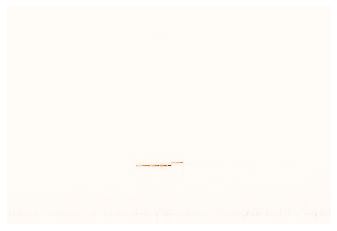

In [16]:
#Show the image with matplotlib
plt.imshow(crop_img)
plt.axis('off')
plt.show()

In [17]:
gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(crop_img, (x1, y1), (x2, y2), (0, 0, 128), 1)

In [18]:
edges = cv2.Canny(gray,50,150,apertureSize = 7)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('snd-P3.20160212.0028.3_lines.png',crop_img)
cv2.imwrite('snd-P3.20160212.0028.3_edges.png',edges)

True

In [19]:
len(lines)

330

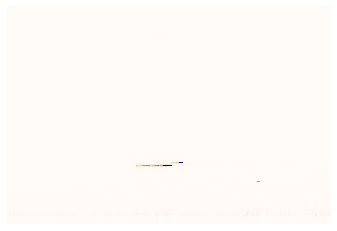

In [20]:
#Show the image with matplotlib
limg = cv2.imread('snd-P3.20160212.0028.3_lines.png', 1)
plt.imshow(limg)
plt.axis('off')
plt.show()